In [1]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
from torchvision.transforms import ToTensor, ToPILImage
import matplotlib.pyplot as plt
from projection_utils import make_proj_grid
from PIL import Image
import numpy as np
%matplotlib inline

In [2]:
loader = ToTensor()
deproc = ToPILImage()

In [3]:
im = Image.open('./360.jpg')

## Usage

In [4]:
im_var = loader(im)[None]
im_var.requires_grad = True

In [5]:
coords = make_proj_grid(0, np.pi / 3, 200).astype(np.float32)
coords_var = torch.from_numpy(coords)[None]

In [6]:
projection_var = F.grid_sample(im_var, coords_var)

In [7]:
dummy_loss = 10 * torch.sum(projection_var)

In [8]:
dummy_loss.backward()

In [9]:
im_grad = deproc(im_var.grad.squeeze())

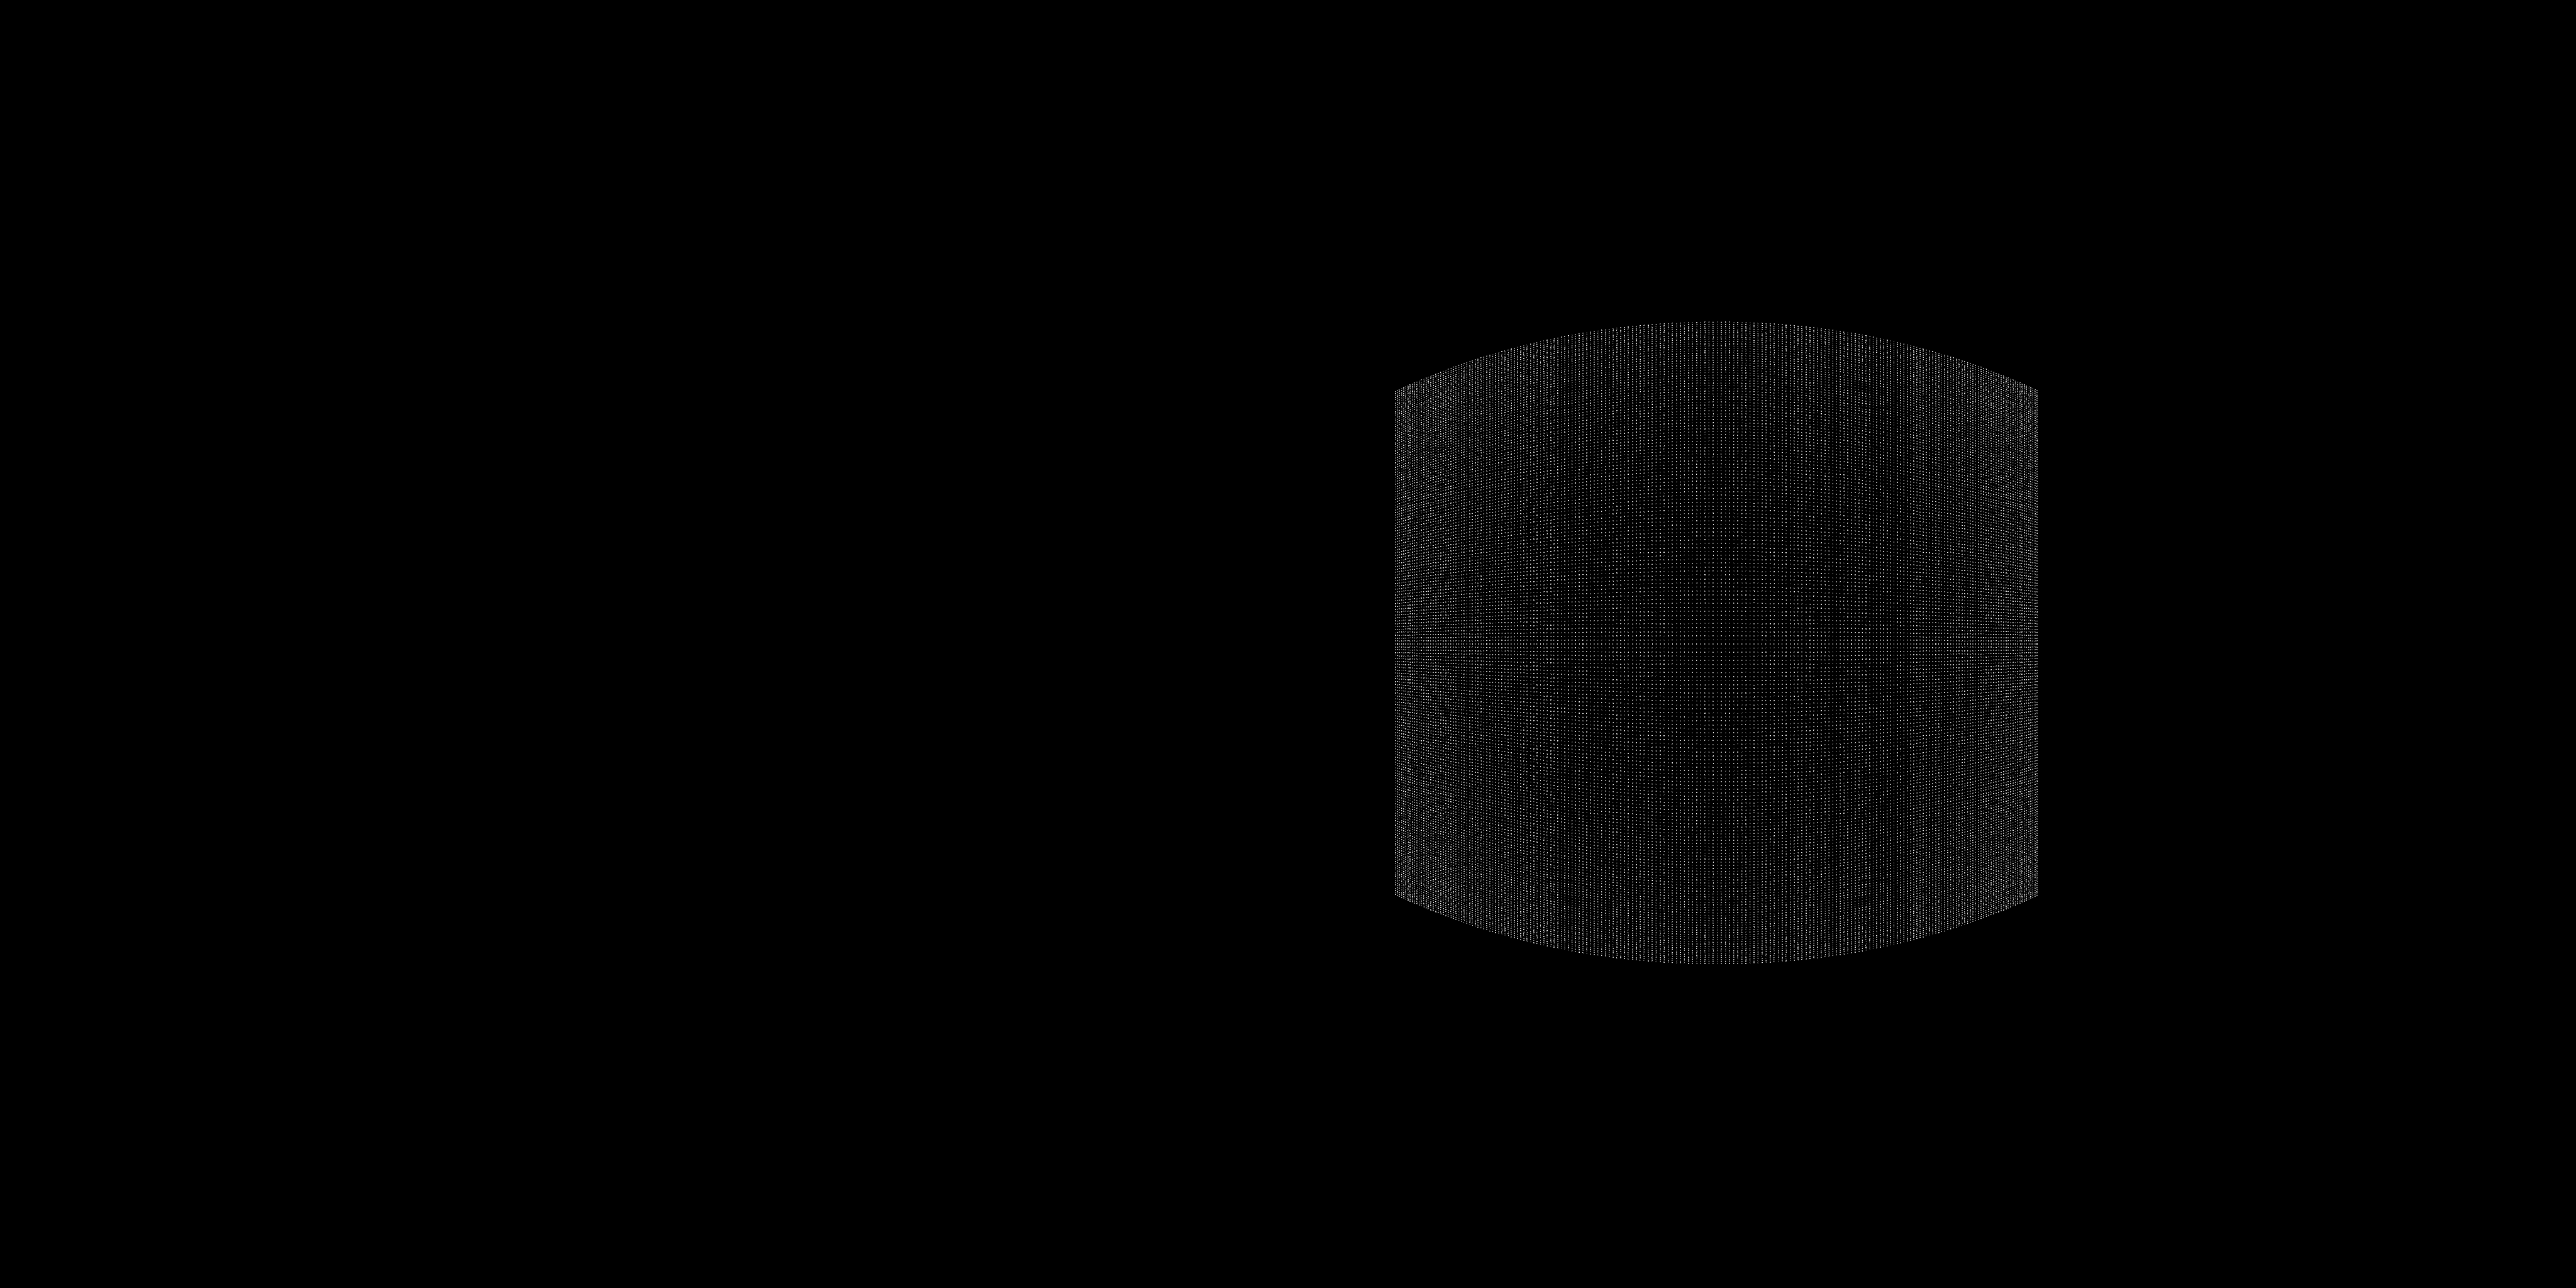

In [10]:
im_grad

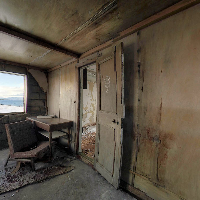

In [11]:
im = deproc(projection_var.squeeze())
im